## PROJECT: TIME SERIES ANALYSIS OF NAICS

### A: Introduction

* **NAICS Dataset Purpose** 

The North American Industry Classification System (NAICS) is an industry classification system developed by the
statistical agencies of Canada, Mexico and the United States. Created against the background of the North
American Free Trade Agreement, it is designed to provide common definitions of the industrial structure of the three
countries and a common statistical framework to facilitate the analysis of the three economies. NAICS is based on
supply-side or production-oriented principles, to ensure that industrial data, classified to NAICS, are suitable for the
analysis of production-related issues such as industrial performance.
NAICS is a comprehensive system encompassing all economic activities. It has a hierarchical structure. At the
highest level, it divides the economy into 20 sectors. At lower levels, it further distinguishes the different economic
activities in which businesses are engaged.

* **Task**

Prepare the data set and analyze as DS

#### Questions
* Which most companies hired the most in Canada?
* How employment in Construction evolved overtime? In which month the recruitments are most important?
* How employment in Construction evolved over time, compared to the total employment across all industries?
* How food manufacturing companies have evolved in recruitment over time ? In which month the recruitments are most important?

* How employment in Repair, personal and non-profit services evolved over time? At what month are volunteers most needed?



### B: Preparation of the data set

In [1]:
#Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os
print(os.listdir())

['.ipynb_checkpoints', 'alldata.xlsx', 'A_NEWLY_HIRED_DATA_ANALYST.zip', 'cd2.xlsx', 'cd3.xlsx', 'cd4.xlsx', 'Challenge.ipynb', 'Data Scientist.ipynb', 'data.csv', 'data.xlsx', 'Deep.ipynb', 'In_SynthDataArachide2019prArticle.csv', 'LMO_Detailed_Industries_by_NAICS.xlsx', 'p.xlsx', 'parkinsons.data', 'parkinsons.names', 'pd_speech_features.csv', 'script_parkinson.ipynb', 'setie.xlsx', 'Time_Series_NAICS', 'Time_Series_NAICS.ipynb', 'tt.xlsx', 'tt1.xlsx', 'tt2.xlsx', 'Untitled.ipynb', 'Untitled1.ipynb', 'Untitled2.ipynb']


In [2]:
file = zipfile.ZipFile('A_NEWLY_HIRED_DATA_ANALYST.zip')
file.namelist()

['A_NEWLY_HIRED_DATA_ANALYST/',
 'A_NEWLY_HIRED_DATA_ANALYST/NAICS-2017 - Statistics-Canada.pdf',
 'A_NEWLY_HIRED_DATA_ANALYST/LMO_Detailed_Industries_by_NAICS.xlsx',
 'A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_4NAICS_97_99.csv',
 'A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_4NAICS_06_10.csv',
 'A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_2NAICS_06_10.csv',
 'A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_3NAICS_11_15.csv',
 'A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_2NAICS_00_05.csv',
 'A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_2NAICS_11_15.csv',
 'A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_2NAICS_16_20.csv',
 'A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_3NAICS_00_05.csv',
 'A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_2NAICS_97_99.csv',
 'A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_3NAICS_06_10.csv',
 'A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_3NAICS_97_99.csv',
 'A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_3NAICS_16_20.csv',
 'A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_4NAICS_16_20.csv',
 'A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_4NAICS_00_05

In [3]:
file

<zipfile.ZipFile filename='A_NEWLY_HIRED_DATA_ANALYST.zip' mode='r'>

#### ***a- Preprocessing of the five 2-digit NAICS datasets***

In [4]:
##Load 1 of 5 datasets
df1 = pd.read_csv(file.open('A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_2NAICS_00_05.csv'))

###Preprocessing for dataset 1 
df1.dropna(inplace = True) 
_ = df1["NAICS"].str.split("[", expand = True) 
df1["_NAICS_"]= _[0] 


_ = _[1].str.split("]", expand = True) 
df1["CODE"]= _[0] 

_ = df1["CODE"].str.split("-", expand = True)
df1["CODE1"] = _[0]
#df1["CODE2"] = _[1]

cols = ['SYEAR', 'SMTH', '_NAICS_', 'CODE1', '_EMPLOYMENT_']


df1.drop(["NAICS", "CODE"], axis=1, inplace=True)
df1 = df1[cols]

In [5]:
df1.head()

,SYEAR,SMTH,_NAICS_,CODE1,_EMPLOYMENT_
0,2000,1,Accommodation and food services,72,148000
1,2000,1,"Administrative and support, waste management a...",56,59250
2,2000,1,"Agriculture, forestry, fishing and hunting",11,61750
3,2000,1,"Arts, entertainment and recreation",71,39500
4,2000,1,Construction,23,106250


In [6]:
##Load 2 of 5 datasets
df2 = pd.read_csv(file.open('A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_2NAICS_11_15.csv'))

###Preprocessing for dataset 2 
df2.dropna(inplace = True) 
_ = df2["NAICS"].str.split("[", expand = True) 
df2["_NAICS_"]= _[0] 


_ = _[1].str.split("]", expand = True) 
df2["CODE"]= _[0] 

_ = df2["CODE"].str.split("-", expand = True)
df2["CODE1"] = _[0]
#df2["CODE2"] = _[1]

df2.drop(["NAICS", "CODE"], axis=1, inplace=True)
df2 = df2[cols]

In [7]:
df2.head()

,SYEAR,SMTH,_NAICS_,CODE1,_EMPLOYMENT_
0,2011,1,Accommodation and food services,72,172000
1,2011,1,"Administrative and support, waste management a...",56,87750
2,2011,1,"Agriculture, forestry, fishing and hunting",11,38500
3,2011,1,"Arts, entertainment and recreation",71,58500
4,2011,1,Construction,23,180250


In [8]:
##Load 3 of 5 datasets
df3 = pd.read_csv(file.open('A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_2NAICS_16_20.csv'))

###Preprocessing for dataset 3 
df3.dropna(inplace = True) 
_ = df3["NAICS"].str.split("[", expand = True) 
df3["_NAICS_"]= _[0] 


_ = _[1].str.split("]", expand = True) 
df3["CODE"]= _[0] 

_ = df3["CODE"].str.split("-", expand = True)
df3["CODE1"] = _[0]
#df3["CODE2"] = _[1]

df3.drop(["NAICS", "CODE"], axis=1, inplace=True)
df3 = df3[cols]

In [9]:
df3.head()

,SYEAR,SMTH,_NAICS_,CODE1,_EMPLOYMENT_
0,2016,1,Accommodation and food services,72,157500
1,2016,1,"Administrative and support, waste management a...",56,92250
2,2016,1,"Agriculture, forestry, fishing and hunting",11,36500
3,2016,1,"Arts, entertainment and recreation",71,59250
4,2016,1,Construction,23,197250


In [10]:
##Load 4 of 5 datasets
df4 = pd.read_csv(file.open('A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_2NAICS_06_10.csv'))

###Preprocessing for dataset 3 
df4.dropna(inplace = True) 
_ = df4["NAICS"].str.split("[", expand = True) 
df4["_NAICS_"]= _[0] 


_ = _[1].str.split("]", expand = True) 
df4["CODE"]= _[0] 

_ = df4["CODE"].str.split("-", expand = True)
df4["CODE1"] = _[0]
#df4["CODE2"] = _[1]

df4.drop(["NAICS", "CODE"], axis=1, inplace=True)

df4 = df4[cols]

In [11]:
df4.head()

,SYEAR,SMTH,_NAICS_,CODE1,_EMPLOYMENT_
0,2006,1,Accommodation and food services,72,166750
1,2006,1,"Administrative and support, waste management a...",56,82750
2,2006,1,"Agriculture, forestry, fishing and hunting",11,49000
3,2006,1,"Arts, entertainment and recreation",71,65000
4,2006,1,Construction,23,160750


In [12]:
##Load 5 of 5 datasets
df5 = pd.read_csv(file.open('A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_2NAICS_97_99.csv'))

###Preprocessing for dataset 3 
df5.dropna(inplace = True) 
_ = df5["NAICS"].str.split("[", expand = True) 
df5["_NAICS_"]= _[0] 


_ = _[1].str.split("]", expand = True) 
df5["CODE"]= _[0] 

_ = df5["CODE"].str.split("-", expand = True)
df5["CODE1"] = _[0]
#df5["CODE2"] = _[1]

df5.drop(["NAICS", "CODE"], axis=1, inplace=True)

df5 = df5[cols]

In [13]:
df5.head()

,SYEAR,SMTH,_NAICS_,CODE1,_EMPLOYMENT_
0,1997,1,Accommodation and food services,72,129250
1,1997,1,"Administrative and support, waste management a...",56,58500
2,1997,1,"Agriculture, forestry, fishing and hunting",11,62250
3,1997,1,"Arts, entertainment and recreation",71,38750
4,1997,1,Construction,23,118000


#### ***b- Preprocessing of the five 3-digit NAICS datasets***

In [14]:
df6 = pd.read_csv(file.open('A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_3NAICS_06_10.csv'))
###Preprocessing for dataset 1 
df6.dropna(inplace = True) 
_ = df6["NAICS"].str.split("[", expand = True) 
df6["_NAICS_"]= _[0] 

_ = _[1].str.split("]", expand = True) 
df6["CODE"]= _[0] 

_ = df6["CODE"].str.split("-", expand = True)
df6["CODE1"] = _[0]
#df6["CODE2"] = _[1]


df6.drop(["NAICS", "CODE"], axis=1, inplace=True)

cols = ['SYEAR', 'SMTH', '_NAICS_', 'CODE1', '_EMPLOYMENT_']
df6 = df6[cols]

df6.head()

,SYEAR,SMTH,_NAICS_,CODE1,_EMPLOYMENT_
0,2006,1,Aboriginal public administration,914,1000
1,2006,1,Accommodation services,721,32750
2,2006,1,Administrative and support services,561,76750
3,2006,1,Air transportation,481,15000
4,2006,1,Ambulatory health care services,621,51500


In [15]:
df7 = pd.read_csv(file.open('A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_3NAICS_00_05.csv'))
###Preprocessing for dataset 1 
df7.dropna(inplace = True) 
_ = df7["NAICS"].str.split("[", expand = True) 
df7["_NAICS_"]= _[0] 


_ = _[1].str.split("]", expand = True) 
df7["CODE"]= _[0] 

_ = df7["CODE"].str.split("-", expand = True)
df7["CODE1"] = _[0]
#df7["CODE2"] = _[1]

df7.drop(["NAICS", "CODE"], axis=1, inplace=True)
df7 = df7[cols]
df7.head()

,SYEAR,SMTH,_NAICS_,CODE1,_EMPLOYMENT_
0,2000,1,Aboriginal public administration,914,500
1,2000,1,Accommodation services,721,33750
2,2000,1,Administrative and support services,561,55250
3,2000,1,Air transportation,481,17500
4,2000,1,Ambulatory health care services,621,53000


In [16]:
df8 = pd.read_csv(file.open('A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_3NAICS_11_15.csv'))
###Preprocessing for dataset 1 
df8.dropna(inplace = True) 
_ = df8["NAICS"].str.split("[", expand = True) 
df8["_NAICS_"]= _[0] 


_ = _[1].str.split("]", expand = True) 
df8["CODE"]= _[0] 

_ = df8["CODE"].str.split("-", expand = True)
df8["CODE1"] = _[0]
#df8["CODE2"] = _[1]

df8.drop(["NAICS", "CODE"], axis=1, inplace=True)

df8 = df8[cols]
df8.head()

,SYEAR,SMTH,_NAICS_,CODE1,_EMPLOYMENT_
0,2011,1,Aboriginal public administration,914,1750
1,2011,1,Accommodation services,721,30750
2,2011,1,Administrative and support services,561,82250
3,2011,1,Air transportation,481,14250
4,2011,1,Ambulatory health care services,621,73000


In [17]:
df9 = pd.read_csv(file.open('A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_3NAICS_97_99.csv'))
###Preprocessing for dataset 1 
df9.dropna(inplace = True) 
_ = df9["NAICS"].str.split("[", expand = True) 
df9["_NAICS_"]= _[0] 


_ = _[1].str.split("]", expand = True) 
df9["CODE"]= _[0] 

_ = df9["CODE"].str.split("-", expand = True)
df9["CODE1"] = _[0]
#df9["CODE2"] = _[1]

df9.drop(["NAICS", "CODE"], axis=1, inplace=True)
df9 = df9[cols]
df9.head()

,SYEAR,SMTH,_NAICS_,CODE1,_EMPLOYMENT_
0,1997,1,Aboriginal public administration,914,500
1,1997,1,Accommodation services,721,24000
2,1997,1,Administrative and support services,561,56750
3,1997,1,Air transportation,481,17000
4,1997,1,Ambulatory health care services,621,40000


In [18]:
df10 = pd.read_csv(file.open('A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_3NAICS_97_99.csv'))
###Preprocessing for dataset 1 

df10.dropna(inplace = True) 
_ = df10["NAICS"].str.split("[", expand = True) 
df10["_NAICS_"]= _[0] 


_ = _[1].str.split("]", expand = True) 
df10["CODE"]= _[0] 

_ = df10["CODE"].str.split("-", expand = True)
df10["CODE1"] = _[0]
#df10["CODE2"] = _[1]

df10.drop(["NAICS", "CODE"], axis=1, inplace=True)

df10 = df10[cols]
df10.head()

,SYEAR,SMTH,_NAICS_,CODE1,_EMPLOYMENT_
0,1997,1,Aboriginal public administration,914,500
1,1997,1,Accommodation services,721,24000
2,1997,1,Administrative and support services,561,56750
3,1997,1,Air transportation,481,17000
4,1997,1,Ambulatory health care services,621,40000


In [19]:
df11 = pd.read_csv(file.open('A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_3NAICS_16_20.csv'))
###Preprocessing for dataset 1 

df11.dropna(inplace = True) 
_ = df11["NAICS"].str.split("[", expand = True) 
df11["_NAICS_"]= _[0] 


_ = _[1].str.split("]", expand = True) 
df11["CODE"]= _[0] 

_ = df11["CODE"].str.split("-", expand = True)
df11["CODE1"] = _[0]
#df11["CODE2"] = _[1]

df11.drop(["NAICS", "CODE"], axis=1, inplace=True)

df11 = df11[cols]
df11.head()

,SYEAR,SMTH,_NAICS_,CODE1,_EMPLOYMENT_
0,2016,1,Aboriginal public administration,914,3500
1,2016,1,Accommodation services,721,34750
2,2016,1,Administrative and support services,561,89500
3,2016,1,Air transportation,481,9250
4,2016,1,Ambulatory health care services,621,82250


#### ***c- Preprocessing of the five 4-digit NAICS datasets***

In [20]:
df12 = pd.read_csv(file.open('A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_4NAICS_97_99.csv'))
df12.dropna(inplace = True)
df13 = pd.read_csv(file.open('A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_4NAICS_06_10.csv'))
df13.dropna(inplace = True)
df14 = pd.read_csv(file.open('A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_4NAICS_16_20.csv'))
df14.dropna(inplace = True)
df15 = pd.read_csv(file.open('A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_4NAICS_00_05.csv'))
df15.dropna(inplace = True)
df16 = pd.read_csv(file.open('A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_4NAICS_11_15.csv'))
df16.dropna(inplace = True)

#### ***d- Join all dataset in one***

In [21]:
d2frame = [df2,df3,df4,df5]
digit_2 = df1.append(d2frame, ignore_index=True)
digit_2


,SYEAR,SMTH,_NAICS_,CODE1,_EMPLOYMENT_
0,2000,1,Accommodation and food services,72,148000
1,2000,1,"Administrative and support, waste management a...",56,59250
2,2000,1,"Agriculture, forestry, fishing and hunting",11,61750
3,2000,1,"Arts, entertainment and recreation",71,39500
4,2000,1,Construction,23,106250
...,...,...,...,...,...
5467,1999,12,"Real estate, rental and leasing",53,37000
5468,1999,12,Retail trade,44,230750
5469,1999,12,Transportation and warehousing,48,117500
5470,1999,12,Utilities,22,10250


In [22]:
d3frame = [df7,df8,df9,df10]
digit_3 = df6.append(d2frame, ignore_index=True)
digit_3

,SYEAR,SMTH,_NAICS_,CODE1,_EMPLOYMENT_
0,2006,1,Aboriginal public administration,914,1000
1,2006,1,Accommodation services,721,32750
2,2006,1,Administrative and support services,561,76750
3,2006,1,Air transportation,481,15000
4,2006,1,Ambulatory health care services,621,51500
...,...,...,...,...,...
10147,1999,12,"Real estate, rental and leasing",53,37000
10148,1999,12,Retail trade,44,230750
10149,1999,12,Transportation and warehousing,48,117500
10150,1999,12,Utilities,22,10250


In [23]:
d4frame = [df13,df14,df15,df16]
digit_4 = df12.append(d4frame, ignore_index=True)
digit_4 = digit_4.rename(columns={'NAICS': 'CODE1'})
digit_4

,SYEAR,SMTH,CODE1,_EMPLOYMENT_
0,1997,1,1100,3500
1,1997,1,1111,250
2,1997,1,1112,500
3,1997,1,1113,2250
4,1997,1,1114,5250
...,...,...,...,...
85567,2015,12,9111,1750
85568,2015,12,9120,28750
85569,2015,12,9130,29750
85570,2015,12,9141,4750


In [24]:
##concatenate all these dataframe into one
dataset = pd.concat([digit_2, digit_3, digit_4], axis=0, ignore_index=True)

#just to save in excel format or csv, it depends on your feeling
#dataset.to_excel("alldata.xlsx", sheet_name='sheet1')

##Convert CODE1 in integers for the newt preprocessing queries
#dataset['CODE1'] = dataset['CODE1'].astype('int64')
dataset = dataset.dropna()

In [25]:
dataset.columns

Index(['SYEAR', 'SMTH', '_NAICS_', 'CODE1', '_EMPLOYMENT_'], dtype='object')

In [26]:
dataset['CODE1'] = pd.to_numeric(dataset['CODE1'], downcast='integer', errors='coerce')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15504 entries, 0 to 15623
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SYEAR         15504 non-null  int64 
 1   SMTH          15504 non-null  int64 
 2   _NAICS_       15504 non-null  object
 3   CODE1         15504 non-null  int16 
 4   _EMPLOYMENT_  15504 non-null  int64 
dtypes: int16(1), int64(3), object(1)
memory usage: 635.9+ KB


#### ***e- Extraction Industries code in LMO_Detailed_Industries_by_NAICS file***

In [27]:
code = pd.read_excel('LMO_Detailed_Industries_by_NAICS.xlsx')
code['NAICS'] = code['NAICS'].apply(lambda _: str(_))
code['NAICS2'] = code['NAICS'].replace('&',',',regex=True)


In [ ]:
c = list(code['NAICS2'].values)
c

In [29]:
from itertools import chain 
code['NAICS3'] = code['NAICS2'].astype('string')
x = code.NAICS3.str.split(',',expand=True)
ls_code = list(chain.from_iterable(list(x.values)))
new_list = [i for i in ls_code if str(i) != '<NA>']

In [ ]:
new_list

In [31]:
##Conversion my list type in integer
list_of_code = [int(i) for i in new_list]

In [ ]:
list_of_code

### C: Data analysis
 *   dataset for the time series analysis
 *   list of code of industries for queries to extract subdata

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15504 entries, 0 to 15623
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SYEAR         15504 non-null  int64 
 1   SMTH          15504 non-null  int64 
 2   _NAICS_       15504 non-null  object
 3   CODE1         15504 non-null  int16 
 4   _EMPLOYMENT_  15504 non-null  int64 
dtypes: int16(1), int64(3), object(1)
memory usage: 635.9+ KB


In [34]:
dataset.head()

,SYEAR,SMTH,_NAICS_,CODE1,_EMPLOYMENT_
0,2000,1,Accommodation and food services,72,148000
1,2000,1,"Administrative and support, waste management a...",56,59250
2,2000,1,"Agriculture, forestry, fishing and hunting",11,61750
3,2000,1,"Arts, entertainment and recreation",71,39500
4,2000,1,Construction,23,106250


In [36]:
nam = {'_EMPLOYMENT_': 'Employment', 'SYEAR': 'Year', 
       'SMTH': 'Month', '_NAICS_': 'Naics', 'CODE1': 'Code'}
dataset = dataset.rename(columns=nam)
dataset

,Year,Month,Naics,Code,Employment
0,2000,1,Accommodation and food services,72,148000
1,2000,1,"Administrative and support, waste management a...",56,59250
2,2000,1,"Agriculture, forestry, fishing and hunting",11,61750
3,2000,1,"Arts, entertainment and recreation",71,39500
4,2000,1,Construction,23,106250
...,...,...,...,...,...
15619,1999,12,"Real estate, rental and leasing",53,37000
15620,1999,12,Retail trade,44,230750
15621,1999,12,Transportation and warehousing,48,117500
15622,1999,12,Utilities,22,10250


In [37]:
cd2 = dataset.loc[dataset['Code'].isin([x for x in list_of_code if x<100])]
cd3 = dataset.loc[dataset['Code'].isin([x for x in list_of_code if x>99 and x<1000])]
cd4 = dataset.loc[dataset['Code'].isin([x for x in list_of_code if x>999])]

#### Questions
* Which most companies hired the most in Canada?
* How employment in Construction evolved overtime? In which month the recruitments are most important?
* How employment in Construction evolved over time, compared to the total employment across all industries?
* How food manufacturing companies have evolved in recruitment over time ? In which month the recruitments are most important?

* How employment in Repair, personal and non-profit services evolved over time? At what month are volunteers most needed?



**Q1: Which 3 companies hired the most in Canada?**

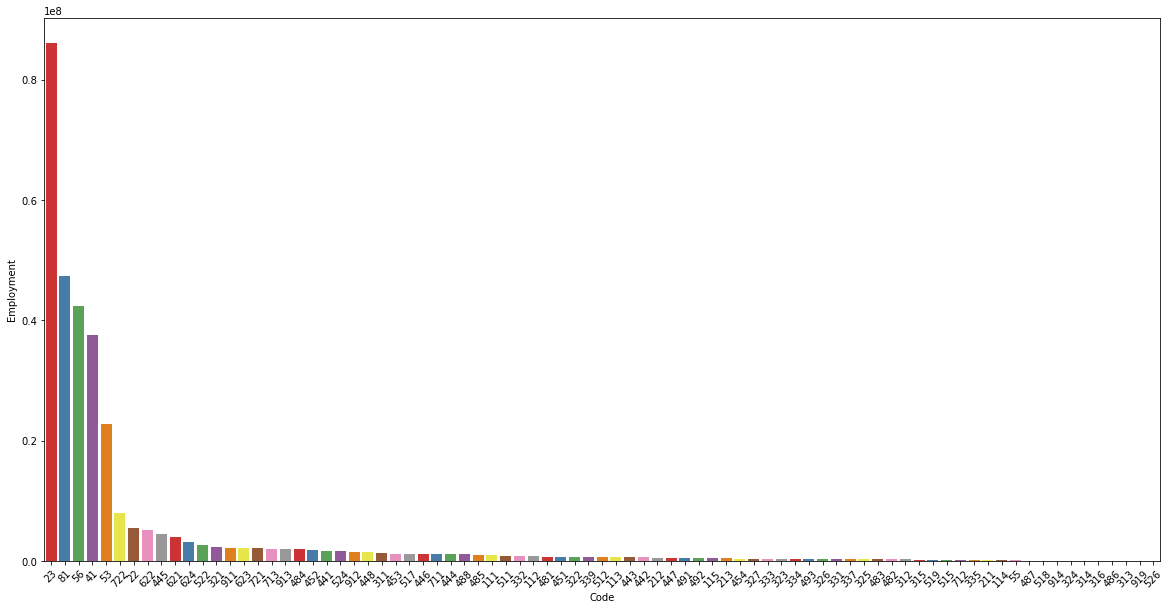

In [228]:
most2 = cd2.groupby(['Code']).agg(Employment=('Employment', 'sum')).reset_index()
most3 = cd3.groupby(['Code']).agg(Employment=('Employment', 'sum')).reset_index()
most4 = cd4.groupby(['Code']).agg(Employment=('Employment', 'sum')).reset_index()
most = most2.append([most3, most4], ignore_index=True)
f = most.sort_values(by='Employment', ascending = False)

import seaborn as sns
plt.figure(figsize=(20,10))
ax = sns.barplot('Code', 'Employment', data=most,order=f['Code'], palette='Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

* The top 2 companies that hire the most in Canada are: construction companies (23) with 86032500, then non-profit services with 47391750 

**Q2: How employment in Construction evolved overtime? In which month the recruitments are most important?**

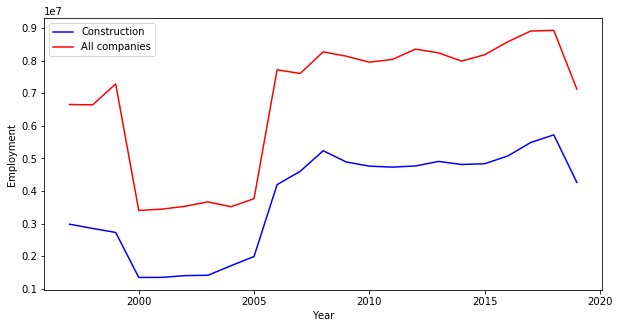

------------
The minimim employment is 1345750 in 2000
The minimim employment is 5721500 in 2018


In [116]:
import seaborn as sns
#construction employment
c23 = cd2.loc[cd2['Code'] == 23]
construction = c23.groupby(['Year']).agg(Employment=('Employment', 'sum')).reset_index()


#Total employment
ctotal = cd2.loc[cd2['Code'] != 23]
total = ctotal.groupby(['Year']).agg(Employment=('Employment', 'sum')).reset_index()

#Plots
plt.figure(figsize=(10,5))
sns.lineplot('Year', 'Employment', data=construction, color="blue", label="Construction")
sns.lineplot('Year', 'Employment', data=total, color="red", label="All companies")
plt.show()
#print(construction[construction.Employment == construction.Employment.min()])
#print(construction[construction.Employment == construction.Employment.max()])
print('------------')
print("The minimim employment is {} in 2000"  .format(construction.Employment.min()))
print("The minimim employment is {} in 2018"  .format(construction.Employment.max()))

In [117]:
import calendar
c23['monthName'] = c23['Month'].apply(lambda x: calendar.month_name[x])
c23

,Year,Month,Naics,Code,Employment,monthName
4,2000,1,Construction,23,106250,January
24,2000,2,Construction,23,115000,February
44,2000,3,Construction,23,106750,March
64,2000,4,Construction,23,105500,April
84,2000,5,Construction,23,113500,May
...,...,...,...,...,...,...
15528,1999,8,Construction,23,120750,August
15548,1999,9,Construction,23,115250,September
15568,1999,10,Construction,23,114000,October
15588,1999,11,Construction,23,118500,November


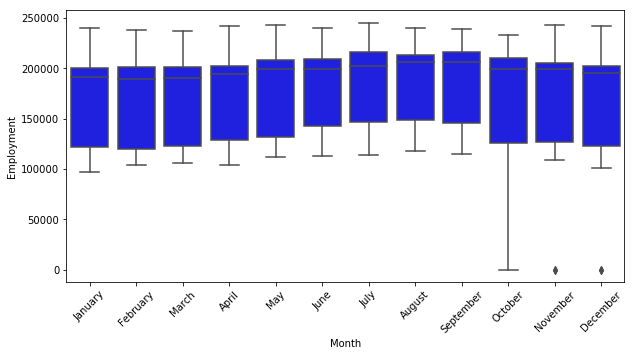

In [224]:
#add month name to dataframe
import calendar
c23 = cd2.loc[cd2['Code'] == 23]
c23['monthName'] = c23['Month'].apply(lambda x: calendar.month_name[x])

#construction employment groupby

const_bymonth = c23.groupby(['Month']).agg(Employment=('Employment', 'sum')).reset_index()

#Plot
plt.figure(figsize=(10,5))
ax = sns.boxplot(x='monthName', y='Employment', data=c23, color="blue")
ax.set(xlabel="Month")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [222]:
const_bymonth['monthName'] = const_bymonth['Month'].apply(lambda x: calendar.month_name[x])
const_bymonth.sort_values(by='Employment', ascending = False)

,Month,Employment,monthName
7,8,190112.50,August
6,7,189118.75,July
8,9,187331.25,September
5,6,184831.25,June
4,5,181925.00,May
3,4,177675.00,April
1,2,174606.25,February
2,3,174525.00,March
0,1,174000.00,January
9,10,173725.00,October


* Employment in construction has fluctuated with a significant downturn in 2000 probably due to the economic crisis. The increase in employment gradually rebounded until 2018, its highest point. From the same year, there was a clear decrease and it is not going to stop with the health crisis of 2020.
* Recruitment in the construction industry is highest for almost 4 months (highest in August). However, the variation is not very significant for the other months, even though December is still the smallest.

**Q3: How employment in Construction evolved over time, compared to the total employment across all industries?**

<Figure size 720x360 with 0 Axes>

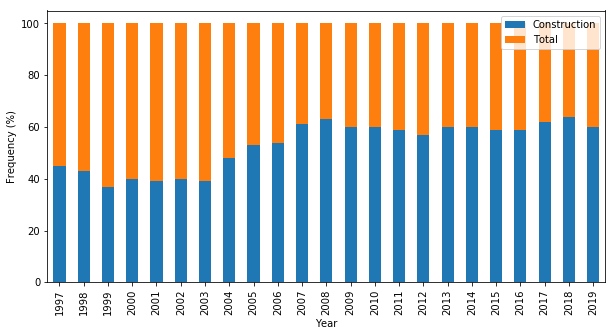

In [121]:

#calculate frequency
construction['Construction'] = round(construction['Employment'] / total['Employment'], 2)*100
construction['Total'] = 100 - round(construction['Employment'] / total['Employment'], 2)*100
#frequency = construction.append(total, ignore_index=False)
#frequency
construction.set_index('Year', inplace=True)
#ploting

plt.figure(figsize=(10,5))
construction[['Construction','Total']].plot(kind='bar', stacked=True, figsize=(10,5))
plt.ylabel("Frequency (%)")
plt.show()


In [122]:
print(construction)


      Employment  Construction  Total
Year                                 
1997     2979500          45.0   55.0
1998     2849500          43.0   57.0
1999     2727000          37.0   63.0
2000     1345750          40.0   60.0
2001     1347250          39.0   61.0
2002     1401500          40.0   60.0
2003     1412000          39.0   61.0
2004     1705000          48.0   52.0
2005     1989000          53.0   47.0
2006     4194000          54.0   46.0
2007     4602000          61.0   39.0
2008     5233500          63.0   37.0
2009     4889500          60.0   40.0
2010     4761500          60.0   40.0
2011     4731500          59.0   41.0
2012     4766500          57.0   43.0
2013     4906000          60.0   40.0
2014     4813000          60.0   40.0
2015     4835500          59.0   41.0
2016     5072000          59.0   41.0
2017     5486500          62.0   38.0
2018     5721500          64.0   36.0
2019     4263000          60.0   40.0


* Generally it is the construction industry that hires the most part of all the companies included in the study, this hiring rate varies on average between 40% and 60%. This result demonstrates the influence of this industry in the Canadian economy.

**Q4: What is the evolution of employment in food manufacturing during the year?**

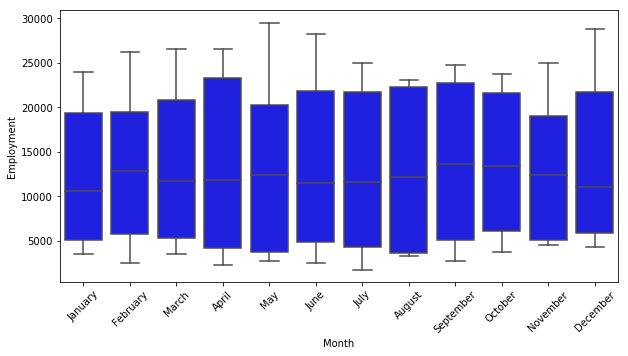

In [214]:
#Food, beverage and tobacco manufacturing 311 & 312
import calendar

cd3 = dataset.loc[dataset['Code'].isin([x for x in list_of_code if x>99 and x<1000])]
cd3['monthName'] = cd3['Month'].apply(lambda x: calendar.month_name[x])
food = cd3.loc[(cd3['Code'] == 311) | (cd3['Code'] == 312)]

#plot
plt.figure(figsize=(10,5))
ax = sns.boxplot(x='monthName', y='Employment', data=food, color="blue")
ax.set(xlabel="Month")
plt.xticks(rotation=45)
plt.show()

In [137]:
import calendar
f = food.groupby(['Month']).agg(Employment=('Employment', 'sum')).reset_index()

f['monthName'] = f['Month'].apply(lambda x: calendar.month_name[x])
ff = f.sort_values(by='Employment', ascending = False)
ff

,Month,Employment,monthName
11,12,137750,December
9,10,137250,October
8,9,136750,September
3,4,133750,April
4,5,132500,May
5,6,132250,June
1,2,132000,February
2,3,132000,March
10,11,130000,November
7,8,128250,August


* Employment in food manufacturing is generally very low and is higher in December than in January.

**Q5:  How employment in Repair, personal and non-profit services evolved over time? At what month are volunteers most needed ?**

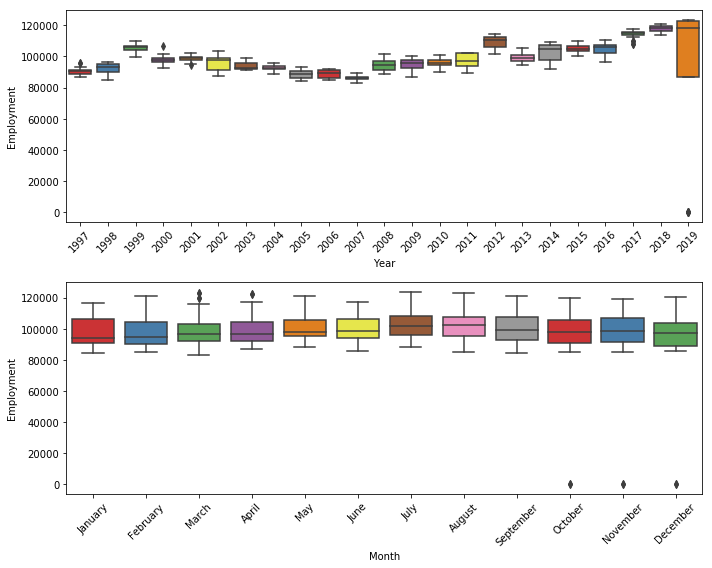

In [216]:
#dataset
volunt = cd2.loc[cd2['Code'] == 81]

volunt['monthName'] = volunt['Month'].apply(lambda x: calendar.month_name[x])

#plot
plt.figure(figsize=(10,8))
plt.subplot(211)
#1
f_vo = sns.boxplot(x='Year', y='Employment', data=volunt, palette='Set1')
f_vo.set(xlabel="Year")
plt.xticks(rotation=45)

plt.subplot(212)
#2
f_vo2 = sns.boxplot(x='monthName', y='Employment', data=volunt, palette='Set1')
f_vo2.set(xlabel="Month")
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()
#volunt

In [225]:

agg_volunt = volunt.groupby(['monthName']).agg(Employment=('Employment', 'mean')).reset_index()

agg_volunt.sort_values(by='Employment', ascending = False)


,monthName,Employment
5,July,102756.25
1,August,102662.50
8,May,101081.25
6,June,100768.75
11,September,99968.75
0,April,99518.75
7,March,99250.00
4,January,98187.50
3,February,98012.50
9,November,95025.00


* Employment in not-for-profit organizations tends significantly over time. At its lowest level in 2007, it increased in the next few years with some fluctuations, peaking in 2019. Average over the months, the difference is not too significant even if October remains the least important period in terms of employment in this sector.

### D: Conclusion

The previous analyses show that the sector that hires the most is the construction sector. Even if during the year 2000, jobs fell dramatically, probably due to the crisis, a gradual recovery is noted in the following years with 2018 as the year that recorded more hiring. This sector represents a major source of employment compared to other sectors.